In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import pandas as pd
import numpy as np
import datetime

Mounted at /content/drive/


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

## Light EDA / Integrity Checks


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/YieldX/Full.csv')
df.rename(columns = {'Tim':'Time'}, inplace = True)
df.head()

,Sensor,ID,Time,Epoch,Temp,Pressure,Humid,Gas,Step,Mode,Lab,Code
0,0,528490597,179000934,1701518415,29.117895,1008.195984,39.726276,400000.0000,0,1,0,0
1,0,528490597,179028341,1701518443,33.252674,1008.177063,37.934704,68357.8125,0,1,0,0
2,0,528490597,179055232,1701518470,34.167095,1008.206787,36.646217,113676.7344,0,1,0,0
3,0,528490597,179082197,1701518497,34.911633,1008.220398,35.614555,145330.6875,0,1,0,0
4,0,528490597,179109071,1701518523,35.566231,1008.218750,34.728664,163892.4531,0,1,0,0


In [ ]:
df.head(20)

,Sensor,ID,Time,Epoch,Temp,Pressure,Humid,Gas,Step,Mode,Lab,Code
0,0,528490597,179000934,1701518415,29.117895,1008.195984,39.726276,400000.0000,0,1,0,0
1,0,528490597,179028341,1701518443,33.252674,1008.177063,37.934704,68357.8125,0,1,0,0
2,0,528490597,179055232,1701518470,34.167095,1008.206787,36.646217,113676.7344,0,1,0,0
3,0,528490597,179082197,1701518497,34.911633,1008.220398,35.614555,145330.6875,0,1,0,0
4,0,528490597,179109071,1701518523,35.566231,1008.218750,34.728664,163892.4531,0,1,0,0
5,0,528490597,179135970,1701518550,36.153378,1008.210144,33.960365,176430.0469,0,1,0,0
6,0,528490597,179163003,1701518577,36.668068,1008.215271,33.284977,183644.1875,0,1,0,0
7,0,528490597,179189867,1701518604,37.160275,1008.240601,32.689522,193463.0625,0,1,0,0
8,0,528490597,179216885,1701518631,37.582527,1008.280701,32.134327,199454.6094,0,1,0,0
9,0,528490597,179243847,1701518658,37.977295,1008.204895,31.651932,203862.2344,0,1,0,0


In [ ]:
df.shape

(744525, 12)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sensor,744525.0,3.494750e+00,2.291830e+00,0.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00,7.000000e+00
ID,744525.0,7.440156e+08,3.774585e+08,0.000000e+00,5.284936e+08,5.285013e+08,5.285254e+08,1.397980e+09
Time,744525.0,1.408961e+09,9.200808e+08,1.790009e+08,5.536741e+08,1.267952e+09,2.189783e+09,3.198174e+09
Epoch,744525.0,1.702808e+09,9.480456e+05,1.701518e+09,1.701900e+09,1.702693e+09,1.703614e+09,1.704623e+09
Temp,744525.0,4.173555e+01,4.480568e+00,2.231529e+01,3.864405e+01,4.166635e+01,4.494428e+01,5.558599e+01
Pressure,744525.0,1.007792e+03,3.070826e+00,9.987971e+02,1.005412e+03,1.008149e+03,1.010390e+03,1.014092e+03
Humid,744525.0,2.870484e+01,5.620564e+00,1.636553e+01,2.465322e+01,2.778431e+01,3.195935e+01,6.115653e+01
Gas,744525.0,7.115800e+06,1.662124e+07,0.000000e+00,3.587947e+05,7.831740e+05,3.875118e+06,1.024000e+08
Step,744525.0,4.470006e+00,2.874737e+00,0.000000e+00,2.000000e+00,4.000000e+00,7.000000e+00,9.000000e+00
Mode,744525.0,8.991934e-01,3.010726e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744525 entries, 0 to 744524
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Sensor    744525 non-null  int64  
 1   ID        744525 non-null  int64  
 2   Time      744525 non-null  int64  
 3   Epoch     744525 non-null  int64  
 4   Temp      744525 non-null  float64
 5   Pressure  744525 non-null  float64
 6   Humid     744525 non-null  float64
 7   Gas       744525 non-null  float64
 8   Step      744525 non-null  int64  
 9   Mode      744525 non-null  int64  
 10  Lab       744525 non-null  int64  
 11  Code      744525 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 68.2 MB


## Distributions

### Numerical features

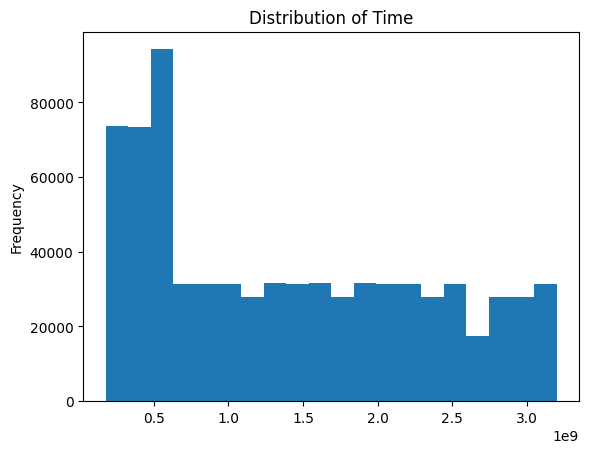

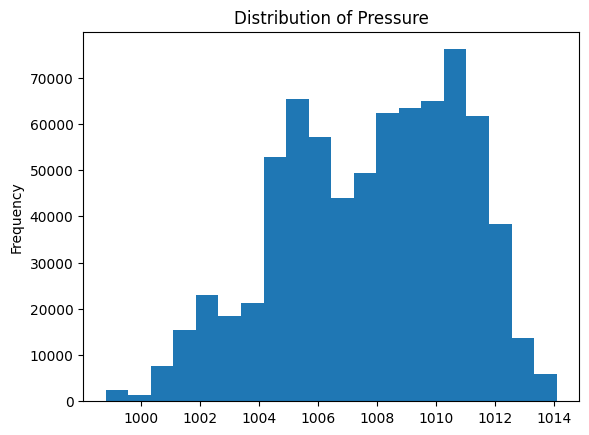

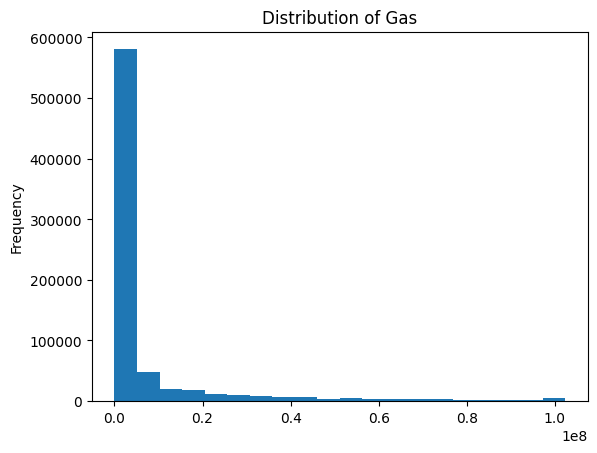

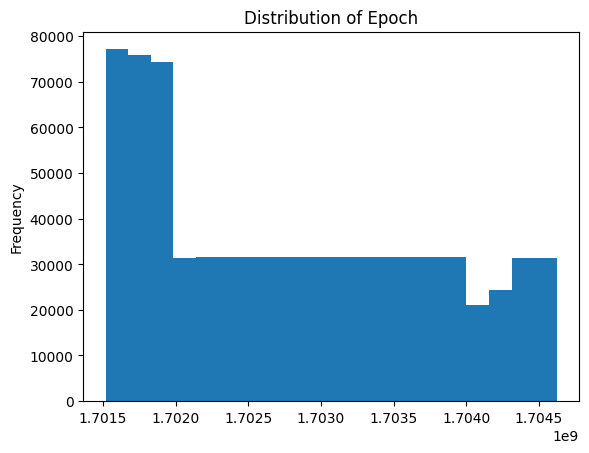

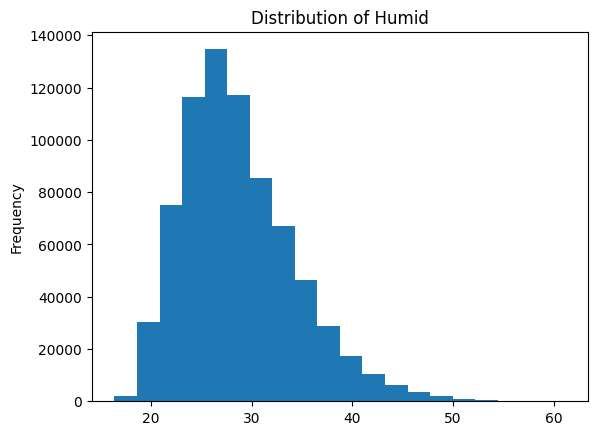

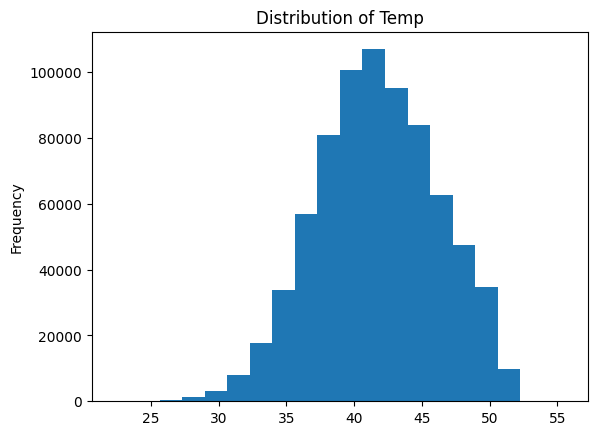

In [ ]:
categorical = ['Sensor', 'ID', 'Step', 'Mode', 'Lab', 'Code']
numerical = list(set(df.columns) - set(categorical))
for feat in numerical:
    df[feat].plot(kind = 'hist', bins=20)
    plt.title(f'Distribution of {feat}')
    plt.show()

### Categorical Features

In [ ]:
for feat in categorical:
  print(f'Feature: {feat}')
  print(df[feat].value_counts())
  print('\n')

Feature: Sensor
Sensor
0    93877
3    93287
2    93201
5    93004
4    93000
6    92774
7    92770
1    92612
Name: count, dtype: int64


Feature: ID
ID
528490597     93668
528497512     93075
1397980207    93054
528525351     92794
528493606     92790
528501286     92599
528512797     92560
1397955631    92433
0              1552
Name: count, dtype: int64


Feature: Step
Step
0    76495
3    74854
4    74836
2    74835
1    74717
5    74209
6    73916
7    73608
8    73554
9    73501
Name: count, dtype: int64


Feature: Mode
Mode
1    669472
0     75053
Name: count, dtype: int64


Feature: Lab
Lab
0    744525
Name: count, dtype: int64


Feature: Code
Code
 0     742613
-12      1552
 1        360
Name: count, dtype: int64




## Removing outliers

For every measurement period of the sensor, the first value recorded for gas is an outlier and must be removed from the data. For example:

In [ ]:
def epoch_to_date(epoch_time):
    date_time = datetime.datetime.utcfromtimestamp(epoch_time)
    formatted_date = date_time.strftime('%Y-%m-%d %H:%M:%S')
    return formatted_date

In [ ]:
df['Datetime'] = df['Epoch'].apply(epoch_to_date)

In [ ]:
# Sort df by Sensor, Step, Epoch
df = df.sort_values(by=['Sensor', 'Step', 'Epoch'])

### Showing presence of outliers

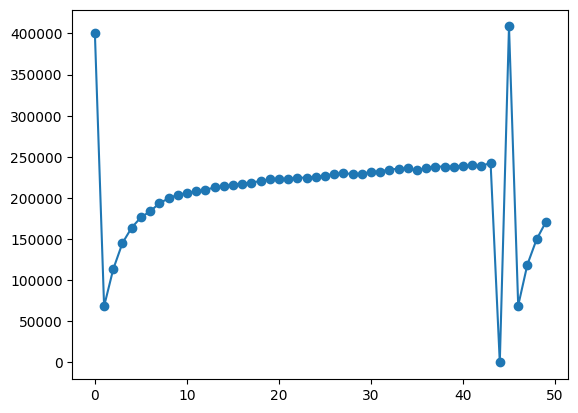

In [ ]:
sample = df.head(50)
plt.plot(sample.index, sample['Gas'], marker='o', linestyle='-')
plt.show()

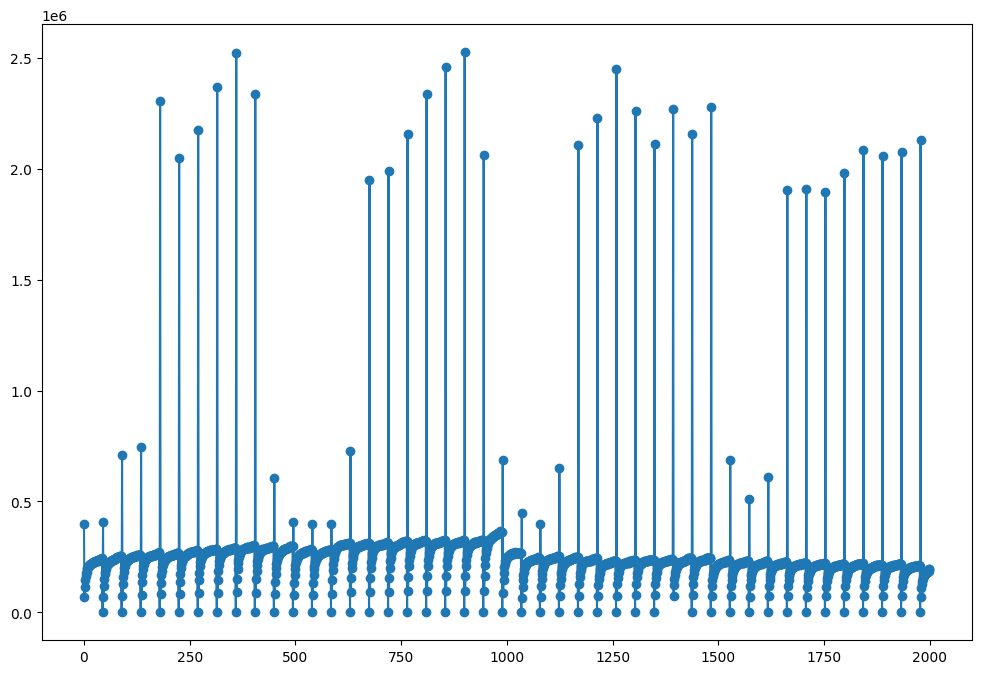

In [ ]:
sample = df.head(2000)
plt.figure(figsize=(12, 8))
plt.plot(sample.index, sample['Gas'], marker='o', linestyle='-')
plt.show()

### Removing systemic outliers

When the sensor begins a new session, it sets Code = -12 and defines Gas = 0. The following row outputs a very high Gas value, which also needs to be removed in addition to the Code = -12 row. We will check if all outliers are from this intentional system, or if there are others that need to be removed.

In [ ]:
def remove_systemic_outliers(df):
    indexes_to_drop = [0]

    for i in range(len(df)):
      if df.iloc[i]['Gas'] == 0:
        indexes_to_drop.append(i)
        indexes_to_drop.append(i+1)

    cleaned_df = df.drop(set(indexes_to_drop))
    return cleaned_df.reset_index(drop=True)

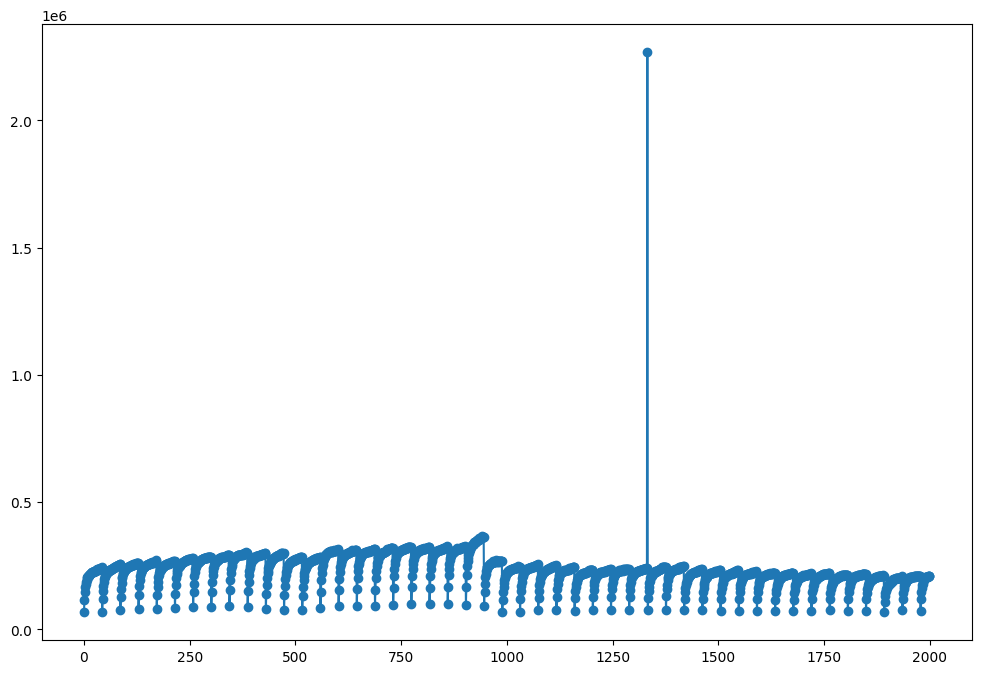

In [ ]:
df_to_check = remove_systemic_outliers(df)
sample_cleaned = df_to_check.head(2000)
plt.figure(figsize=(12, 8))
plt.plot(sample_cleaned.index, sample_cleaned['Gas'], marker='o', linestyle='-')
plt.show()

### Removing systemic outliers and outliers from sensor malfunction

New measurement sessions begin when a large time difference is recorded between rows. We will create a feature to mark these rows.

In [ ]:
# Drop rows where Code = -12
segment_indices_code_12 = df[df['Code'] == -12].index.to_numpy()
segment_indices_to_drop = np.concatenate(([0], segment_indices_code_12))
df = df.drop(segment_indices_to_drop).reset_index(drop=True)

# Remove identical rows
df = df.loc[(df.shift() != df).any(axis=1)]

In [ ]:
df['Time_Diff'] = df['Epoch'].diff() > 1800 # When diff > 30 min
df.head()

,Sensor,ID,Time,Epoch,Temp,Pressure,Humid,Gas,Step,Mode,Lab,Code,Time_Diff
0,0,528490597,179028341,1701518443,33.252674,1008.177063,37.934704,68357.8125,0,1,0,0,False
1,0,528490597,179055232,1701518470,34.167095,1008.206787,36.646217,113676.7344,0,1,0,0,False
2,0,528490597,179082197,1701518497,34.911633,1008.220398,35.614555,145330.6875,0,1,0,0,False
3,0,528490597,179109071,1701518523,35.566231,1008.218750,34.728664,163892.4531,0,1,0,0,False
4,0,528490597,179135970,1701518550,36.153378,1008.210144,33.960365,176430.0469,0,1,0,0,False


In [ ]:
def clean_dataframe(df):
    cleaned_segments = []
    c = 2

    # Indices of first measurement of new session
    # Defines segment start and end points
    segment_indices_time_diff = df[df['Time_Diff'] == True].index.to_numpy()
    segment_indices = np.concatenate(([0], segment_indices_time_diff, [len(df)]))


    for i in range(len(segment_indices)-1):
      segment = df.loc[segment_indices[i]:segment_indices[i+1]-1]
      if not segment['Gas'].isnull().all():
          segment_cleaned = segment.copy()

          # Calculate the IQR
          segment_cleaned = segment.copy()
          Q1 = segment['Gas'].quantile(0.25)
          Q3 = segment['Gas'].quantile(0.75)
          IQR = Q3 - Q1
          lower_bound = 0
          upper_bound = Q3 + c * IQR

          # Define outlier rows and replace Gas value with NaN
          outliers = (segment['Gas'] <= lower_bound) | (segment['Gas'] > upper_bound)
          segment_cleaned.loc[outliers, 'Gas'] = np.nan

          # If first row or non-last row of segment is an outlier, takes value of following row
          segment_cleaned['Gas'].fillna(method='bfill', inplace=True)

          # If last row of segment is an outlier, takes value of previous row
          segment_cleaned['Gas'].fillna(method='ffill', inplace=True)

          cleaned_segments.append(segment_cleaned)

    df_cleaned = pd.concat(cleaned_segments, ignore_index=False)
    return df_cleaned

In [ ]:
df_clean = clean_dataframe(df)
print('df.shape:', df.shape)
print('df_clean.shape:', df_clean.shape)

df.shape: (742972, 13)
df_clean.shape: (742972, 13)


In [ ]:
assert df_clean.isna().any().any() == False

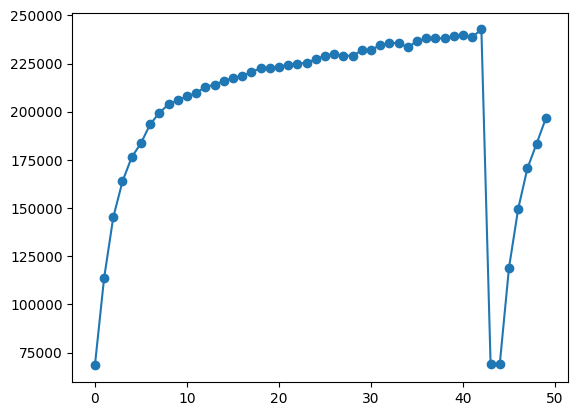

In [ ]:
sample_cleaned = df_clean.head(50)
plt.plot(sample_cleaned.index, sample_cleaned['Gas'], marker='o', linestyle='-')
plt.show()

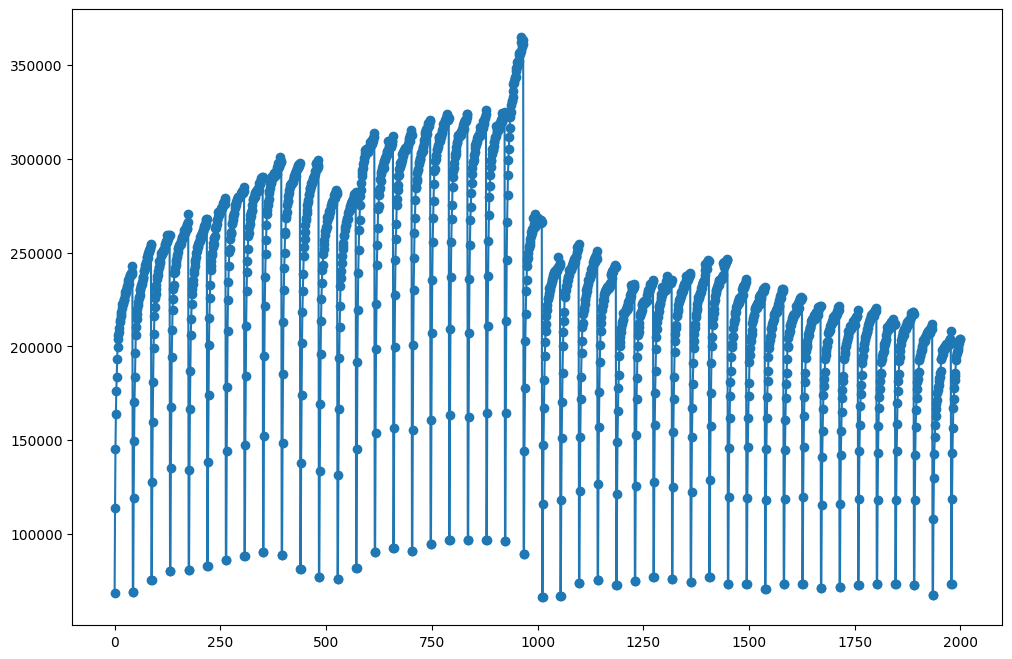

In [ ]:
sample_cleaned = df_clean.head(2000)
plt.figure(figsize=(12, 8))
plt.plot(sample_cleaned.index, sample_cleaned['Gas'], marker='o', linestyle='-')
plt.show()

In [ ]:
df_clean['Sensor_Step'] = df_clean['Sensor']*10 + df_clean['Step']

In [ ]:
df_clean.head()

,Sensor,ID,Time,Epoch,Temp,Pressure,Humid,Gas,Step,Mode,Lab,Code,Time_Diff,Sensor_Step
0,0,528490597,179028341,1701518443,33.252674,1008.177063,37.934704,68357.8125,0,1,0,0,False,0
1,0,528490597,179055232,1701518470,34.167095,1008.206787,36.646217,113676.7344,0,1,0,0,False,0
2,0,528490597,179082197,1701518497,34.911633,1008.220398,35.614555,145330.6875,0,1,0,0,False,0
3,0,528490597,179109071,1701518523,35.566231,1008.218750,34.728664,163892.4531,0,1,0,0,False,0
4,0,528490597,179135970,1701518550,36.153378,1008.210144,33.960365,176430.0469,0,1,0,0,False,0


In [ ]:
# Sorted data for model training
sorted_df_model = df_clean.sort_values(by=['Epoch', 'Time'])


## Labeling Session and Slot number
Slot: Refers to ~20 minute period that the sensors take measurements. Run through about 40 sessions.

Session: Refers to one ~28 second period during a slot that it takes to run through all the heat steps for all the sensors

Slot -> Session

In [ ]:
sorted_df_model['Session'] = np.nan
sorted_df_model['Slot'] = np.nan

In [ ]:
sorted_df_model.head()

,Sensor,ID,Time,Epoch,Temp,Pressure,Humid,Gas,Step,Mode,Lab,Code,Datetime,Time_Diff,Sensor_Step,Session,Slot
186100,2,1397980207,179001095,1701518415,30.303741,1008.057556,38.549332,2.377939e+06,0,1,0,0,2023-12-02 12:00:15,False,20,NaN,NaN
279154,3,528497512,179001118,1701518415,30.235418,1007.954651,39.160534,5.557666e+05,0,1,0,0,2023-12-02 12:00:15,False,30,NaN,NaN
9368,0,528490597,179001754,1701518416,31.606236,1008.226868,39.652863,5.154795e+05,1,1,0,0,2023-12-02 12:00:16,False,1,NaN,NaN
18737,0,528490597,179003154,1701518418,31.796112,1008.213013,38.636940,5.365470e+05,2,1,0,0,2023-12-02 12:00:18,False,2,NaN,NaN
372229,4,528493606,179004218,1701518419,34.087086,1008.484253,35.768444,1.002546e+05,0,1,0,0,2023-12-02 12:00:19,False,40,NaN,NaN


In [ ]:
def label_slot_session(df):
    session=0
    slots=0
    slotEpoch = prevEpoch = df.iloc[0]['Epoch']
    for idx, row in df.iterrows():
        if row['Epoch']-prevEpoch > 20 and row['Step'] == 0:
            session += 1
            prevEpoch = row['Epoch']
            if row['Epoch']-slotEpoch > 30*60:
                slots += 1
                session = 0
                slotEpoch = row['Epoch']

        df.at[idx, 'Slot']=slots
        df.at[idx,'Session']=session

    return df

In [ ]:
sorted_df_model = label_slot_session(sorted_df_model)
sorted_df_model.head()

,Sensor,ID,Time,Epoch,Temp,Pressure,Humid,Gas,Step,Mode,Lab,Code,Datetime,Time_Diff,Sensor_Step,Session,Slot
186100,2,1397980207,179001095,1701518415,30.303741,1008.057556,38.549332,2.377939e+06,0,1,0,0,2023-12-02 12:00:15,False,20,0.0,0.0
279154,3,528497512,179001118,1701518415,30.235418,1007.954651,39.160534,5.557666e+05,0,1,0,0,2023-12-02 12:00:15,False,30,0.0,0.0
9368,0,528490597,179001754,1701518416,31.606236,1008.226868,39.652863,5.154795e+05,1,1,0,0,2023-12-02 12:00:16,False,1,0.0,0.0
18737,0,528490597,179003154,1701518418,31.796112,1008.213013,38.636940,5.365470e+05,2,1,0,0,2023-12-02 12:00:18,False,2,0.0,0.0
372229,4,528493606,179004218,1701518419,34.087086,1008.484253,35.768444,1.002546e+05,0,1,0,0,2023-12-02 12:00:19,False,40,0.0,0.0


In [ ]:
sorted_df_model.to_csv('/content/drive/MyDrive/YieldX/Full_for_model.csv', index=False)

# Plotting Data

Note: dataframes are sorted by 'Sensor' -> 'Step' -> 'Epoch'

## Gas vs Index

In [ ]:
# creating separate df for each sensor
sensor_dfs = {}
for sensor_value in df_clean['Sensor'].unique():
    sensor_df = df_clean[df_clean['Sensor'] == sensor_value]
    sensor_dfs[sensor_value] = sensor_df

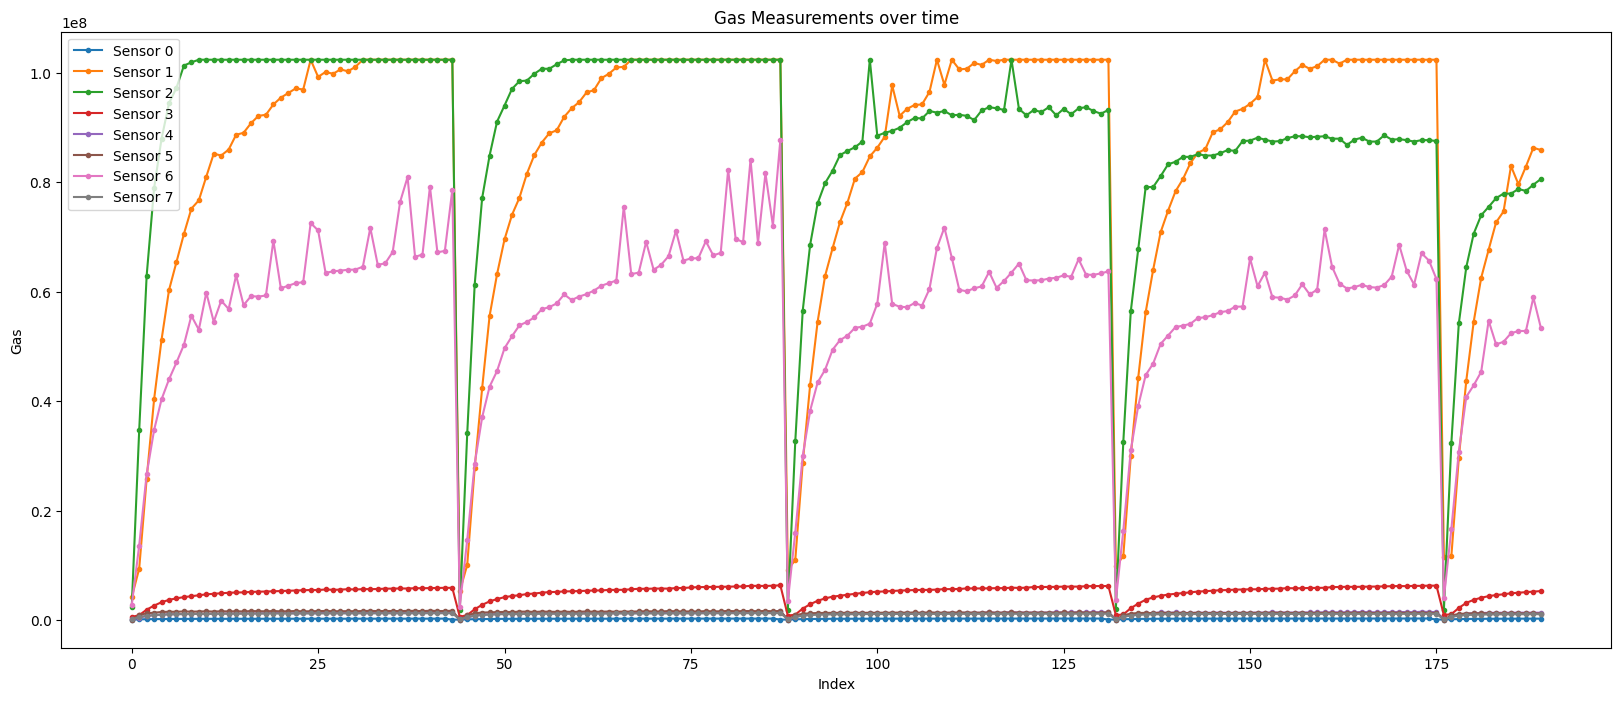

In [ ]:
plt.figure(figsize=(20, 8))
for i in range(8):
  sensor_df = sensor_dfs[i].head(190)
  sensor_df.reset_index(inplace=True)
  plt.plot(sensor_df.index, sensor_df['Gas'], marker='o', markersize=3, linestyle='-', label=f'Sensor {i}')

plt.xlabel('Index')
plt.ylabel('Gas')
plt.title('Gas Measurements over time')
plt.legend()
plt.show()

**Question**
what exactly is the increase before convergence? These points shown are all for the same heat step, so why is there this lag in the detection of the gas?

## Gas vs Step

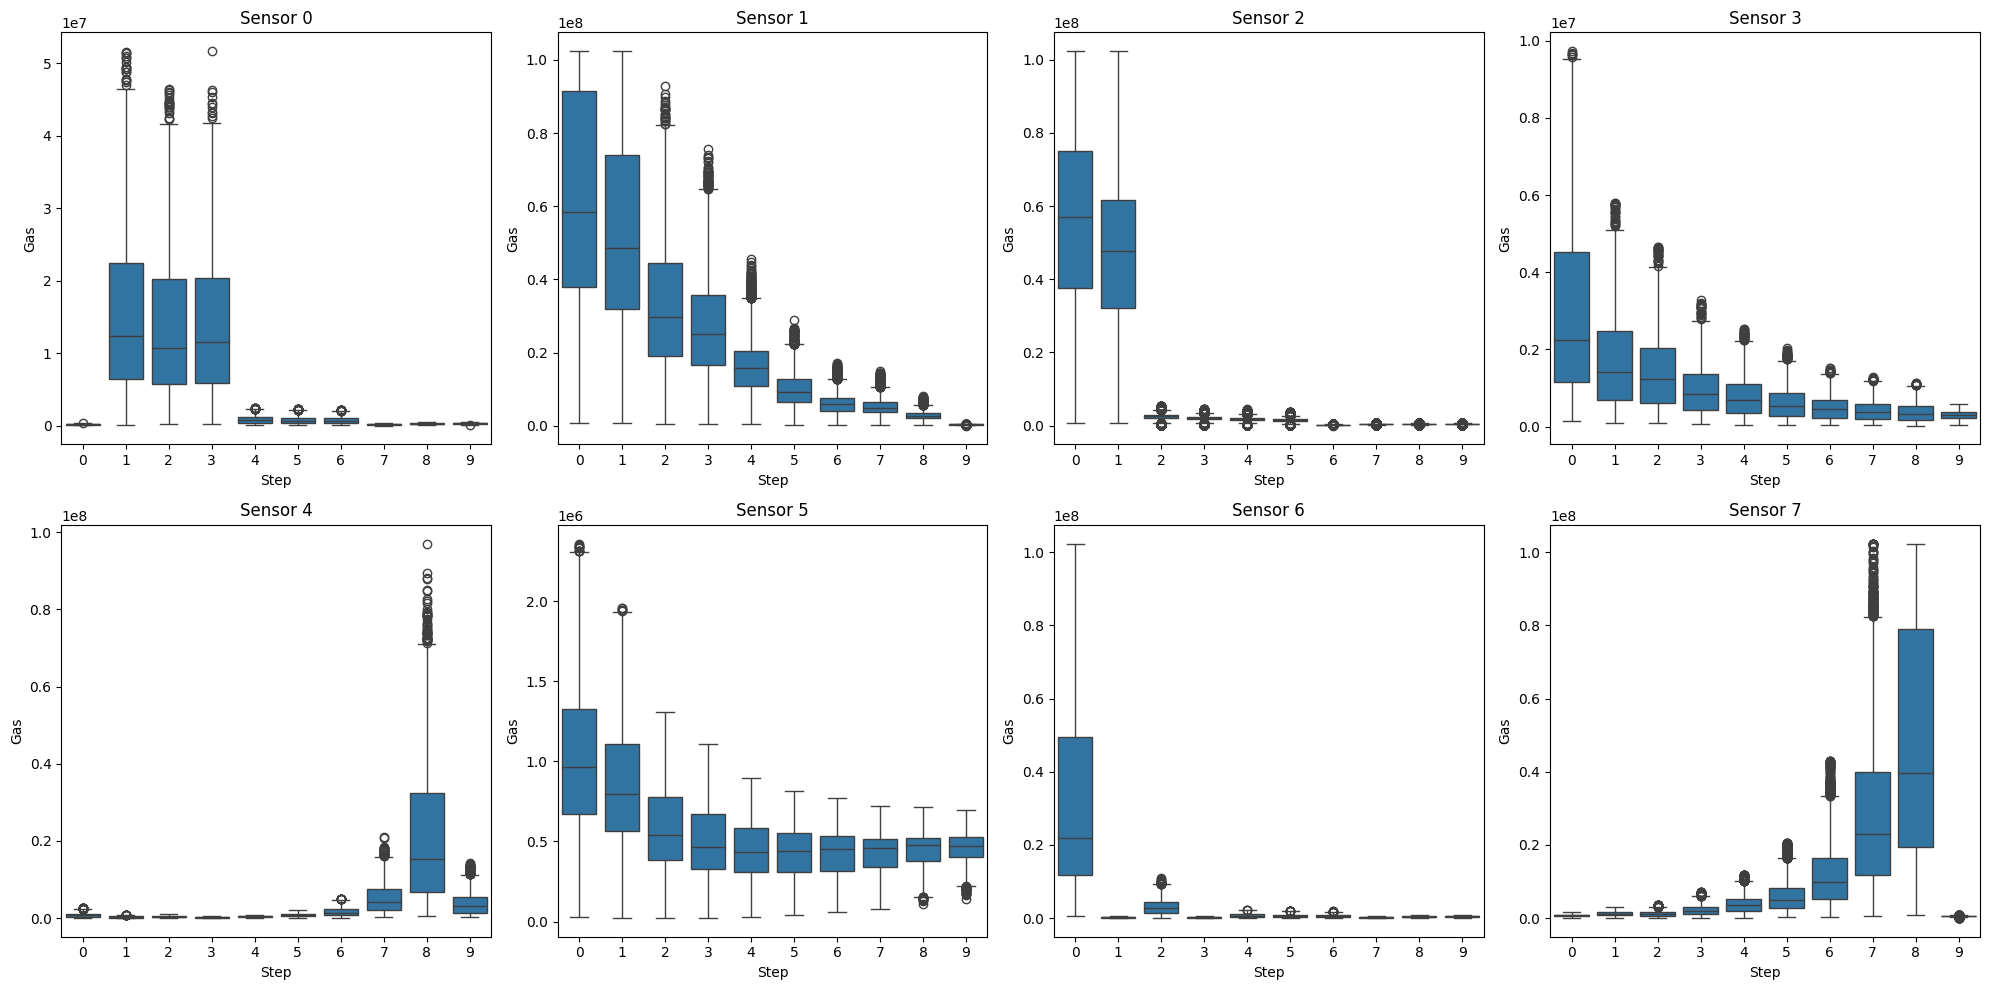

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()
for i in range(8):
  sensor_df = sensor_dfs[i]
  sns.boxplot(x = 'Step', y = 'Gas', data = sensor_df, ax=axes[i])
  axes[i].set_title(f'Sensor {i}')
plt.tight_layout()
plt.show()


Each sensor is meant to detect a different type of VOC.
For Sensor 0, for example, at heat steps 1, 2, and 3, we can see it detects the particular gas much better than at other heat steps. This is also the case with sensors 2, 4, and 6, where a gas is detected at a significantly higher rate at particular temperatures.
Other sensors are able to best detect a particular gas either at the lowest or highest temperature of the range, however, the detection of the gas has a more linear relationship with temperature. For example, in sensor 1 we see that as the temperature increases, the sensor's ability to detect the VOC is gradually diminished.

## Temp, Pressure, Humid versus Step

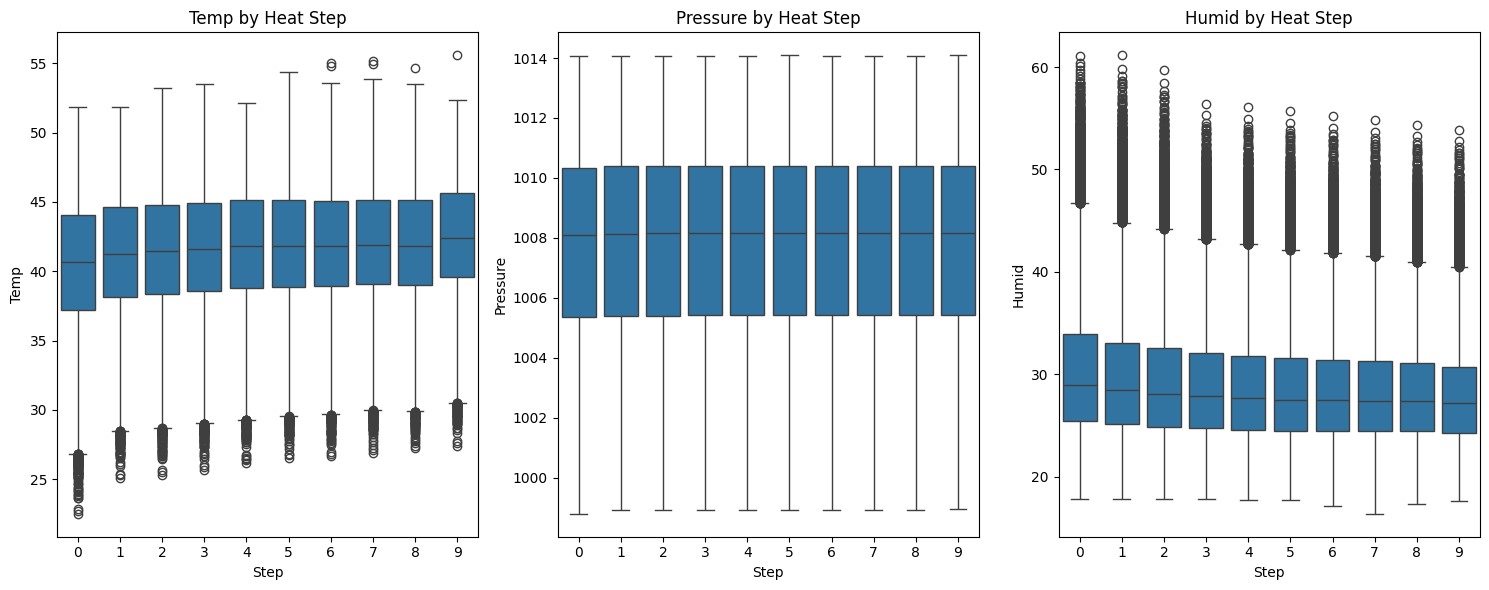

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
axes = axes.flatten()
for i, feat in enumerate(['Temp', 'Pressure', 'Humid']):
  sns.boxplot(x = 'Step', y = feat, data = df_clean, ax=axes[i])
  axes[i].set_title(f'{feat} by Heat Step')
plt.tight_layout()
plt.show()


## Temp, Pressure, Humidity over time

For a particular sensor, we will see the overall trends of the ambiant measurements taken within that sensor.

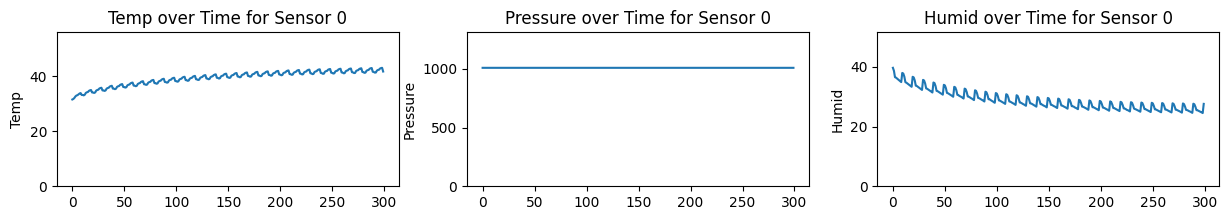

In [ ]:
time_sort_df = df_clean.copy()
time_sort_df = time_sort_df.sort_values(by=['Sensor', 'Epoch']).reset_index(drop=True).head(300)

fig, axes = plt.subplots(1, 3, figsize=(15, 2))
axes = axes.flatten()
for i, feat in enumerate(['Temp', 'Pressure', 'Humid']):
    axes[i].plot(time_sort_df.index[:500], time_sort_df[feat][:500], linestyle='-')
    axes[i].set_title(f'{feat} over Time for Sensor 0')
    axes[i].set_ylabel(feat)
    axes[i].set_ylim(bottom=0, top=time_sort_df[feat][:500].max()*1.3)
